# Representational similarity analysis

Representational similarity analysis (RSA) is widely used to study the representational geometry in the brain.

In this example, we use the brain responses to the 1st run of the _Budapest_ movie, which has 598 time points (TRs).
We compute the representational dissimilarity matrices (RDMs) that are 598×598 in size.
Each entry in the matrix is the dissimilarity (distance) between a pair of time points.

## Preparations

In [1]:
import numpy as np
import neuroboros as nb
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
dset = nb.Budapest()
sids = dset.subjects

In [3]:
dm = dset.get_data(sids[0], 'budapest', 1, 'l')

We use the first participant's left hemisphere data, which has 598 time points and 9675 cortical vertices.

In [4]:
print(dm.shape)
nt, nv = dm.shape

(598, 9675)


## Correlation distance

A commonly used distance for computing RDMs is correlation distance. It is computed as one minus the correlation coefficient. Different from the correlation coefficient, which ranges from -1 to 1, the correlation distance ranges from 0 to 2, where 0 is most similar, and 2 is most dissimilar.

$ \text{correlation distance} = 1 - r $, where $r$ is the correlation coefficient

The RDM has a shape of $n_t \times n_t$, where $n_t$ is the number of time points (or the number of stimuli/conditions for other kinds of data).

### Vectorized upper triangle

The `pdist` function can be used to compute the vectorized upper triangle of the RDM.

The RDM is symmetric, and the upper triangle and the lower triangle contain duplicate information. The diagonal of the RDM is all zeros. Therefore, the vectorized upper triangle contains all the information in the RDM.

In [5]:
d_corr = pdist(dm, 'correlation')

In [6]:
print(d_corr.shape)
print(nt * (nt - 1) // 2)

(178503,)
178503


The `squareform` function can be used to convert the vectorized upper triangle into the full dissimilarity matrix.

In [7]:
mat_corr = squareform(d_corr)
print(mat_corr.shape)

(598, 598)


Each entry is the dissimilarity between a pair of brain response patterns. For example, between time points 0 and 1.

In [8]:
print(mat_corr[0, 1])
r, p = pearsonr(dm[0], dm[1])
print(1 - r)

0.4217507049050603
0.4217507049050596


It can also convert the matrix into the vectorized upper triangle.

In [9]:
np.testing.assert_array_equal(squareform(mat_corr), d_corr)

We can also manually reconstruct the dissimilarity matrix from the vectorized upper triangle.

In [10]:
mat = np.full((nt, nt), np.nan)

ii, jj = np.triu_indices(nt, 1)
print(ii.shape, jj.shape)

mat[ii, jj] = d_corr
mat[jj, ii] = d_corr
mat[np.arange(nt), np.arange(nt)] = 0

(178503,) (178503,)


In [11]:
np.testing.assert_allclose(mat_corr, mat)

### Alternative method to compute correlation distance

Instead of `pdist` and `squareform`, `np.corrcoef` can be used to compute correlation coefficients, which can be converted to correlation distances.

In [12]:
np.testing.assert_allclose(
    1 - np.corrcoef(dm),
    mat_corr,
    atol=1e-10,
)

## Visualize the RDM

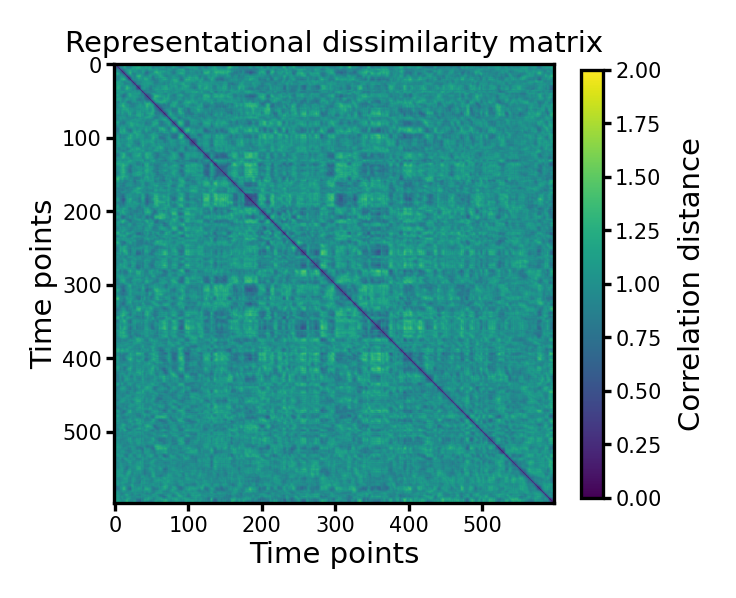

In [13]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(mat_corr, vmax=2, vmin=0, cmap='viridis')

ax.set_title('Representational dissimilarity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Time points', size=7, labelpad=1)
ax.set_ylabel('Time points', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Correlation distance', size=7)
plt.show()

## Correlation matrix

Note that in the RDM, larger values mean larger distance and the pair of time points are more dissimilar. We can convert the correlation-based RDM into a correlation matrix, where larger values mean more similar.

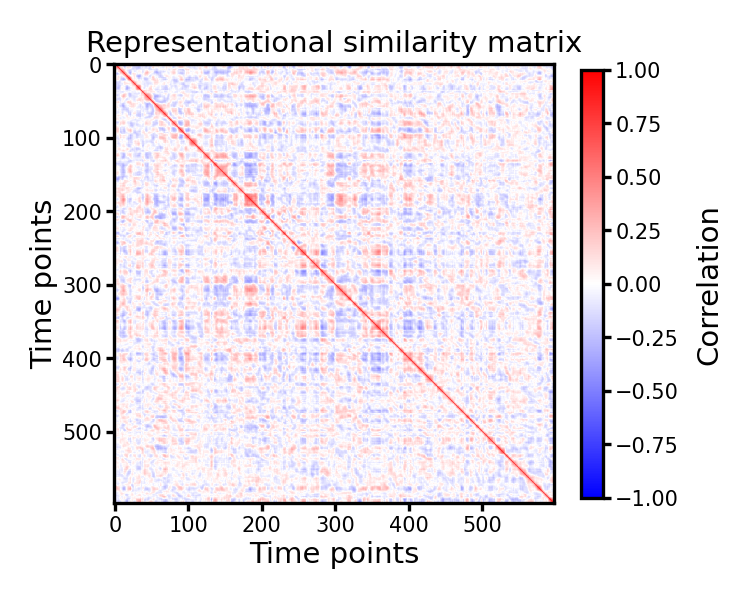

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(1 - mat_corr, vmax=1, vmin=-1, cmap='bwr')

ax.set_title('Representational similarity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Time points', size=7, labelpad=1)
ax.set_ylabel('Time points', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Correlation', size=7)
plt.show()

## Other kinds of distances

There are many different kinds of distances, besides the correlation distance in the previous example.
See the documentation of [`pdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) for a list of available distance metrics.

The example below shows an RDM based on Euclidean distance.

In [15]:
d_eucl = pdist(dm, 'euclidean')
mat_eucl = squareform(d_eucl)

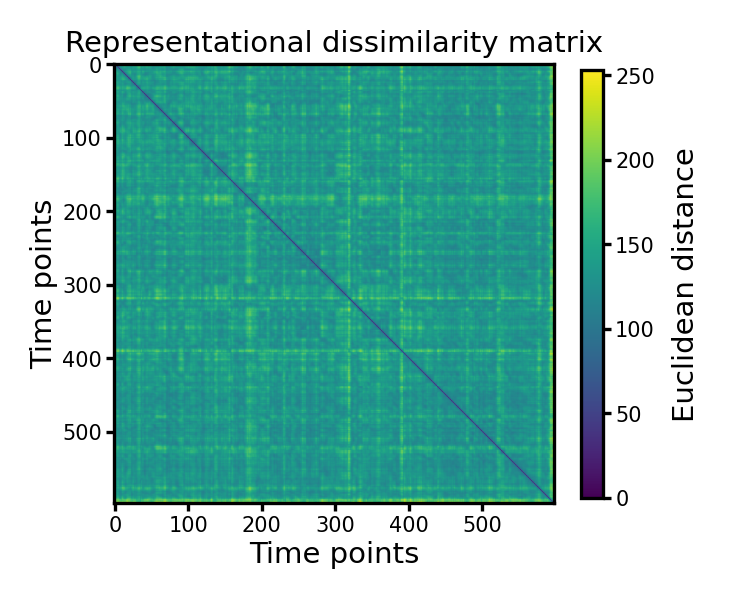

In [16]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(mat_eucl, cmap='viridis')

ax.set_title('Representational dissimilarity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Time points', size=7, labelpad=1)
ax.set_ylabel('Time points', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Euclidean distance', size=7)
plt.show()